- **Name -Aditya Jain**
- **Batch No.- DS2310**
- **Assignment - Bank Marketing**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
test = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [4]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
for col in train.select_dtypes(include='object').columns:
    print(col)
    print(train[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


Hence, 'Suscribed' is the target variables.

checking the datatypes of the variable

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


**Now, check the shape of each datasets**

In [9]:
train.shape

(31647, 18)

In [10]:
test.shape

(13564, 17)

Hence, we can see that we have 17 similar features in the both the datasets and 'Subscribed' is the value that is to be predicted

# **Data Exploration**

**Now, Checking for missing value of each datasets**

In [11]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

**categorial features**

In [13]:
cat=[col for col in train.select_dtypes(include='object').columns if (col not in ['subscribed'])]
print(cat)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


**Analysis of categorial features**

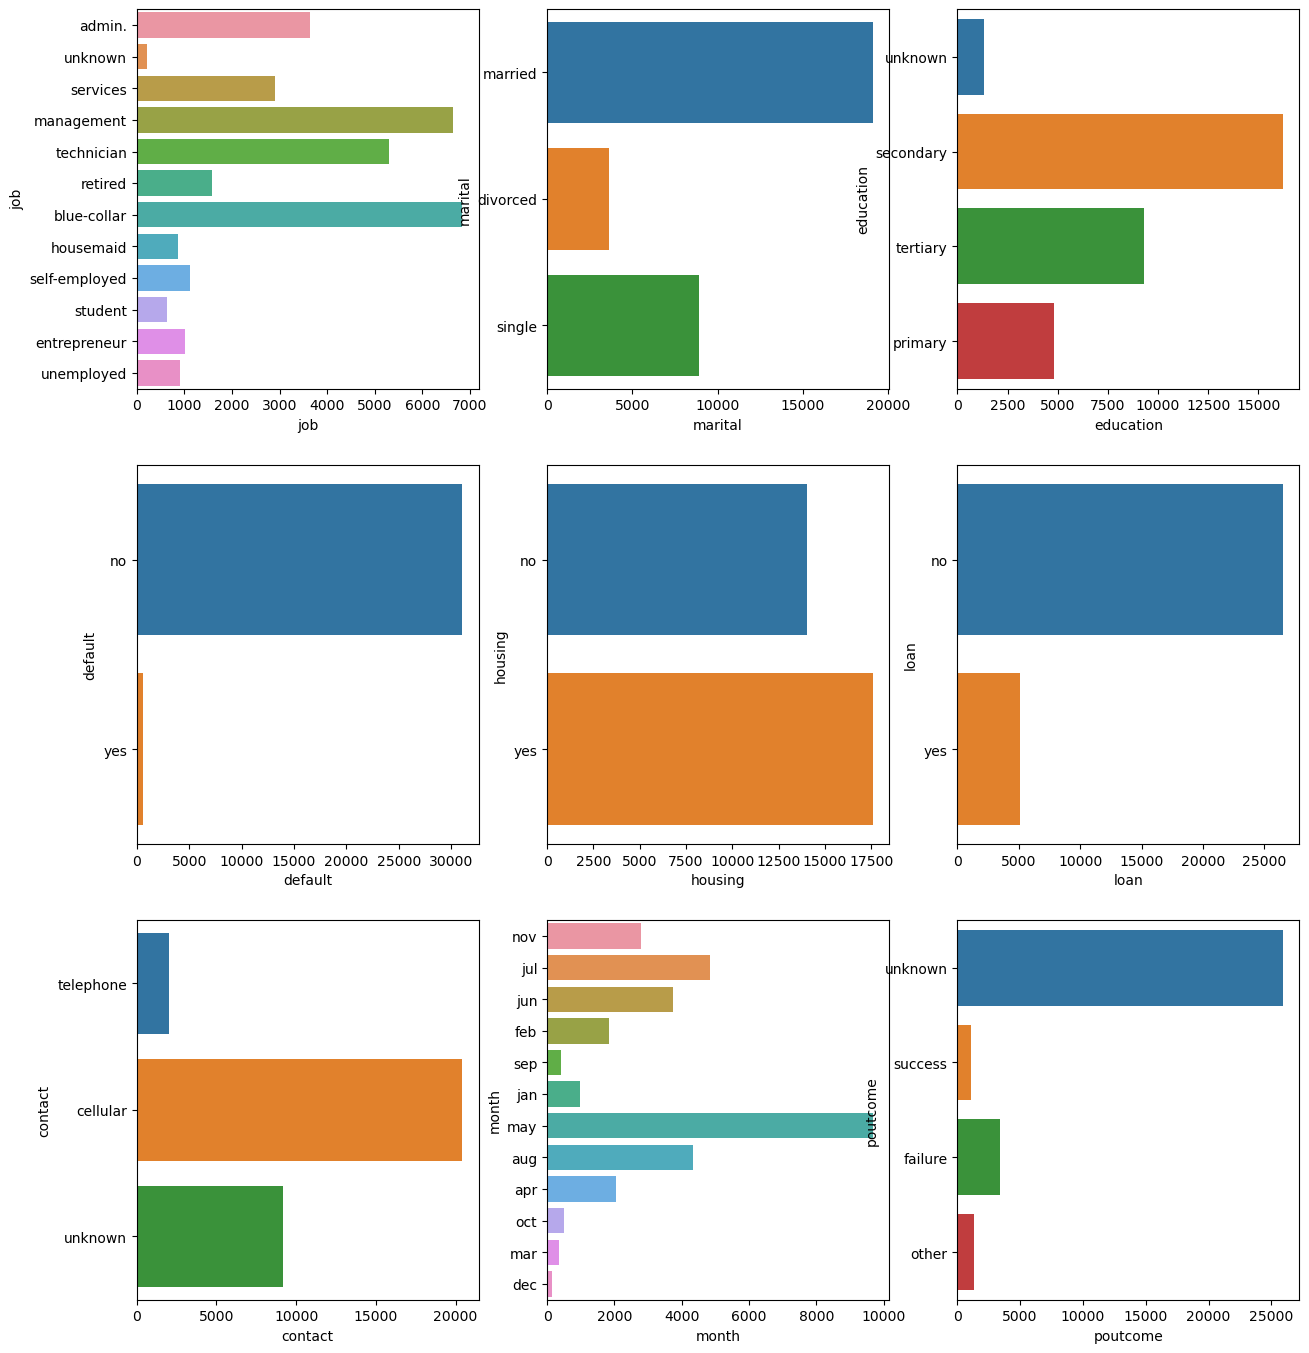

In [14]:
plt.figure(figsize=(15,70), facecolor = 'white')
plotnumber = 1
for cate in cat:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cate,data = train)
    plt.xlabel(cate)
    plt.ylabel(cate)
    plotnumber+=1
plt.show()

**relation between categorial features and target fatures**

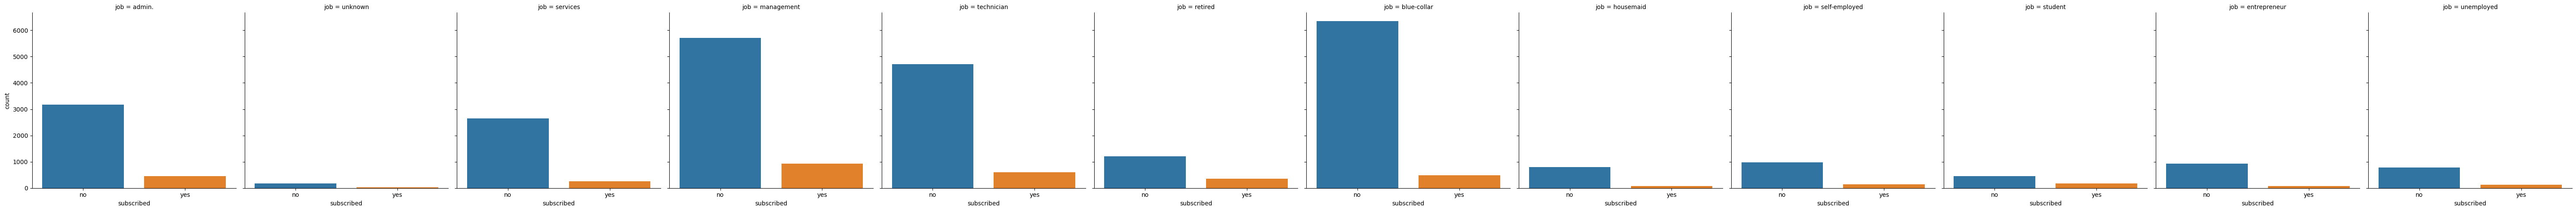

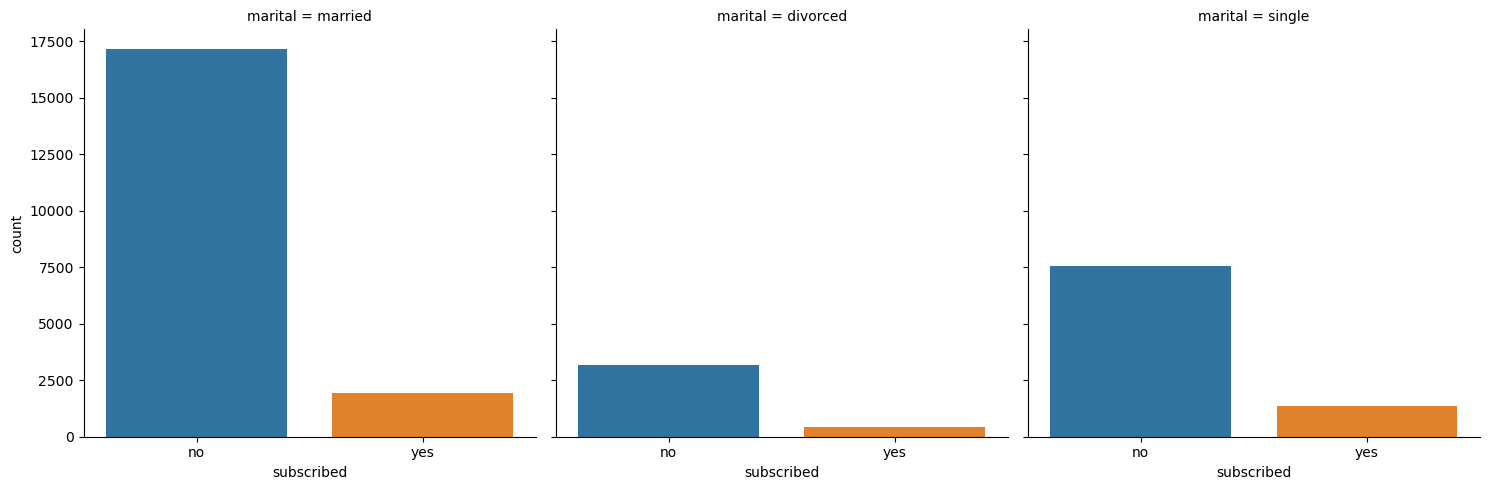

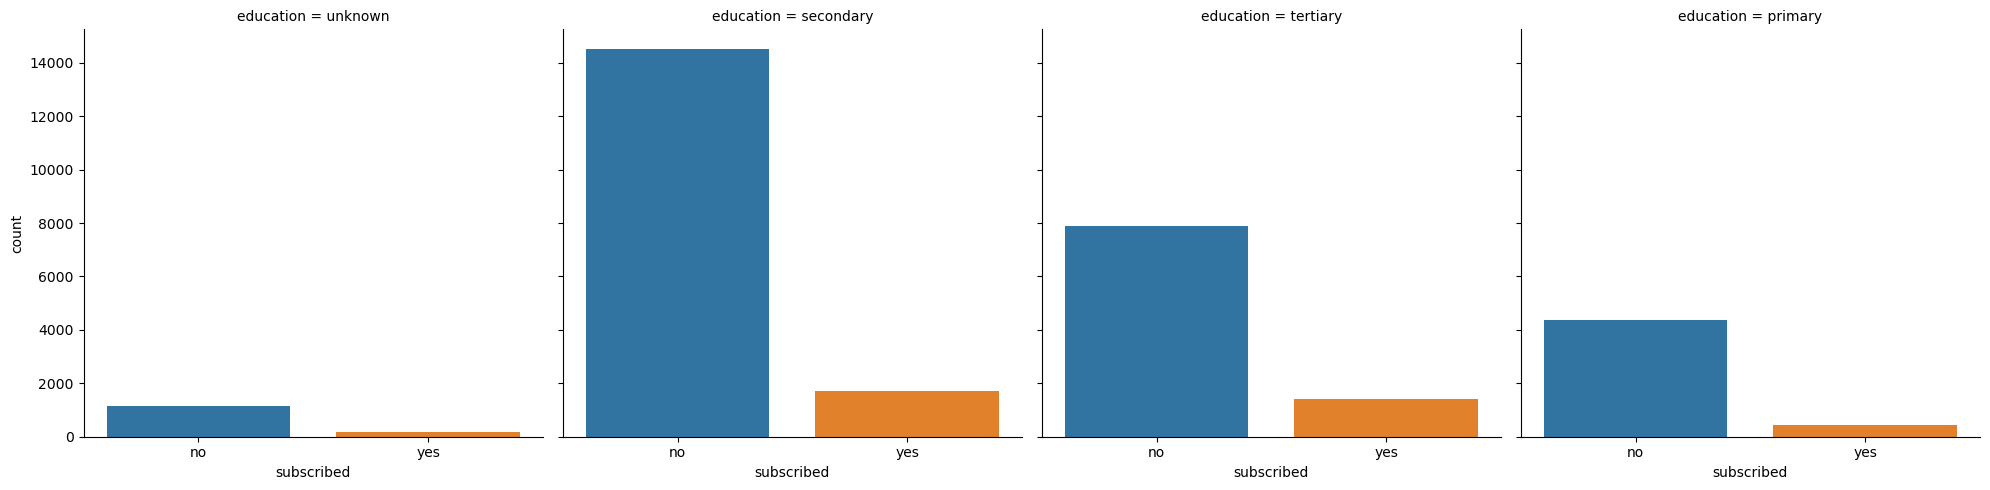

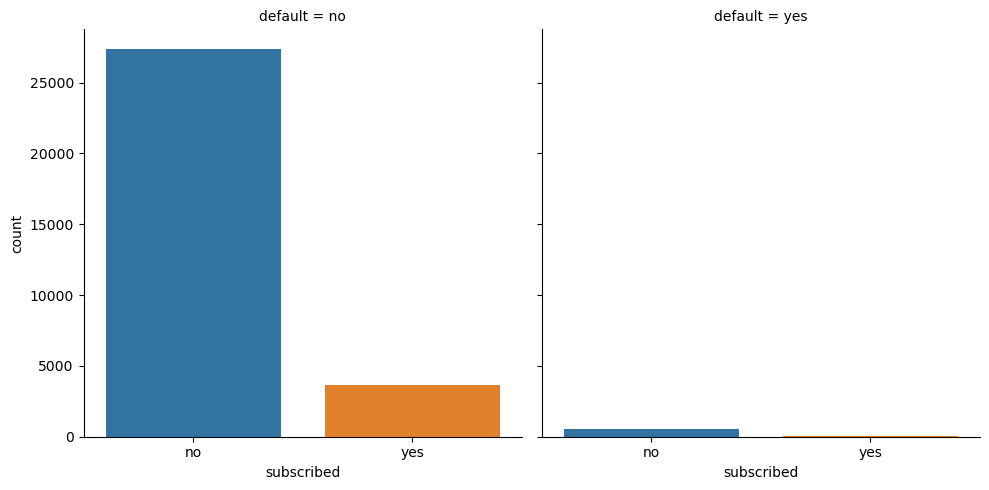

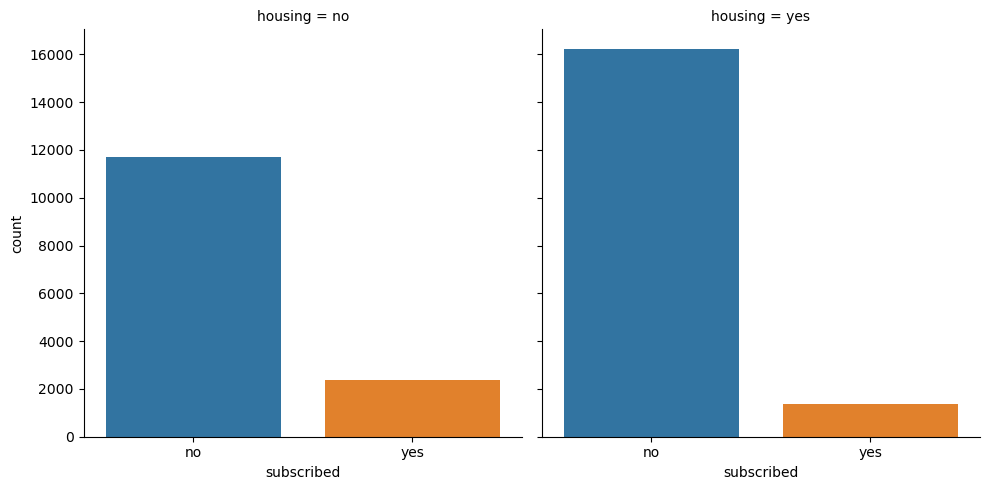

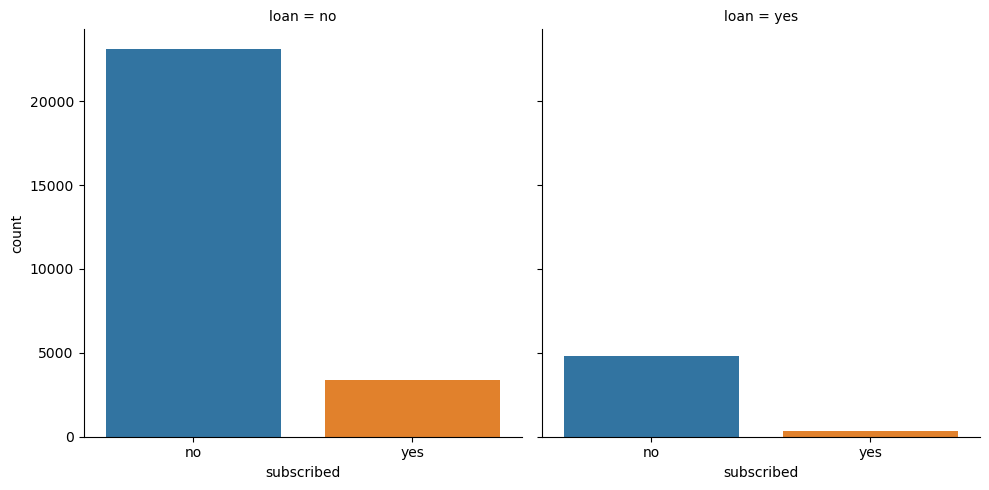

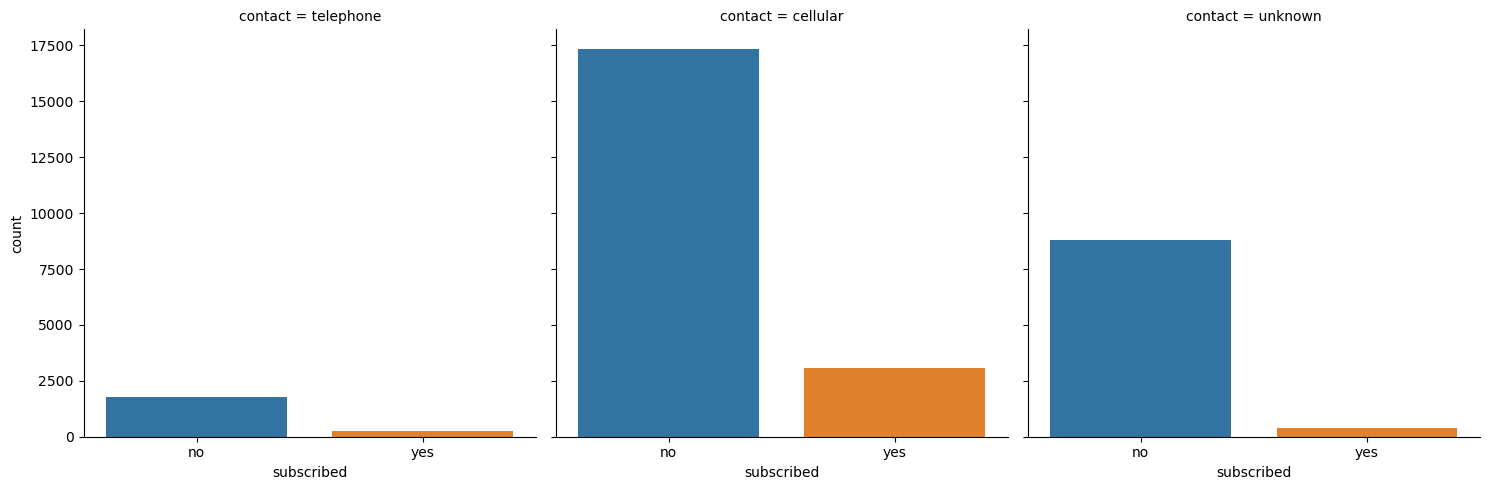

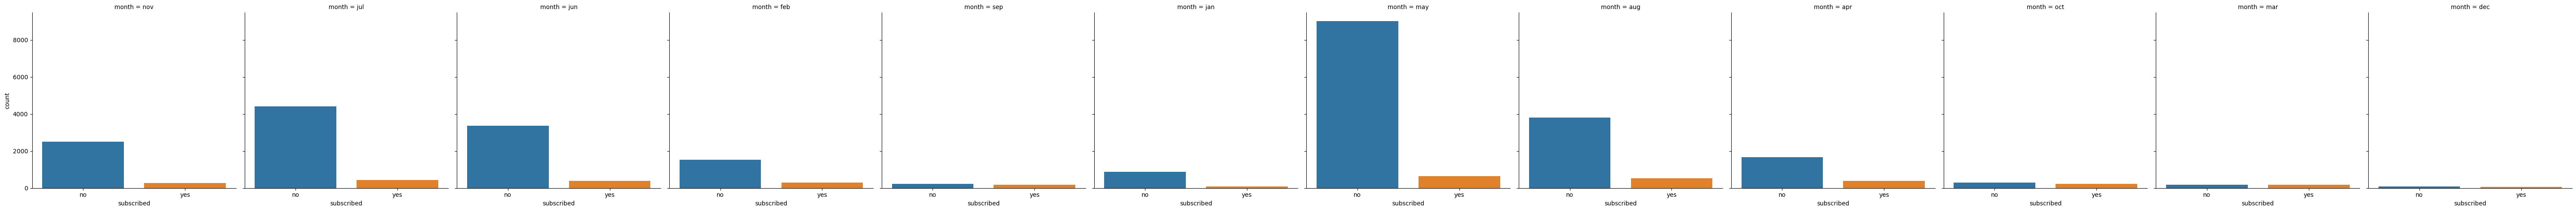

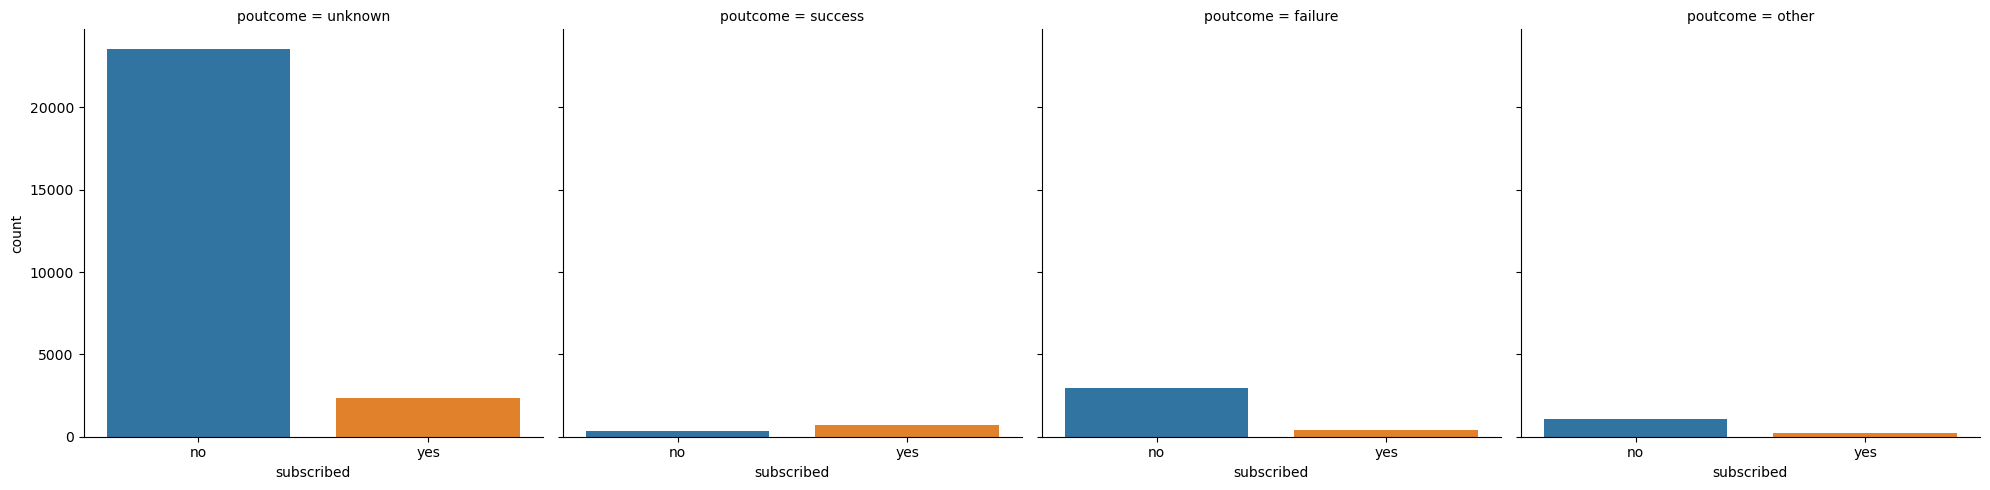

In [15]:
for cate in cat:
    sns.catplot(x='subscribed', col = cate, kind = 'count', data = train)
plt.show()

**Numerical Features**
    

In [16]:
num = [col for col in train.select_dtypes(include = 'integer').columns if(col not in ['subscribed'])]
print(num)
print(type(num))

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
<class 'list'>


In [17]:
#removing the column id
del num[0]
print(num)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


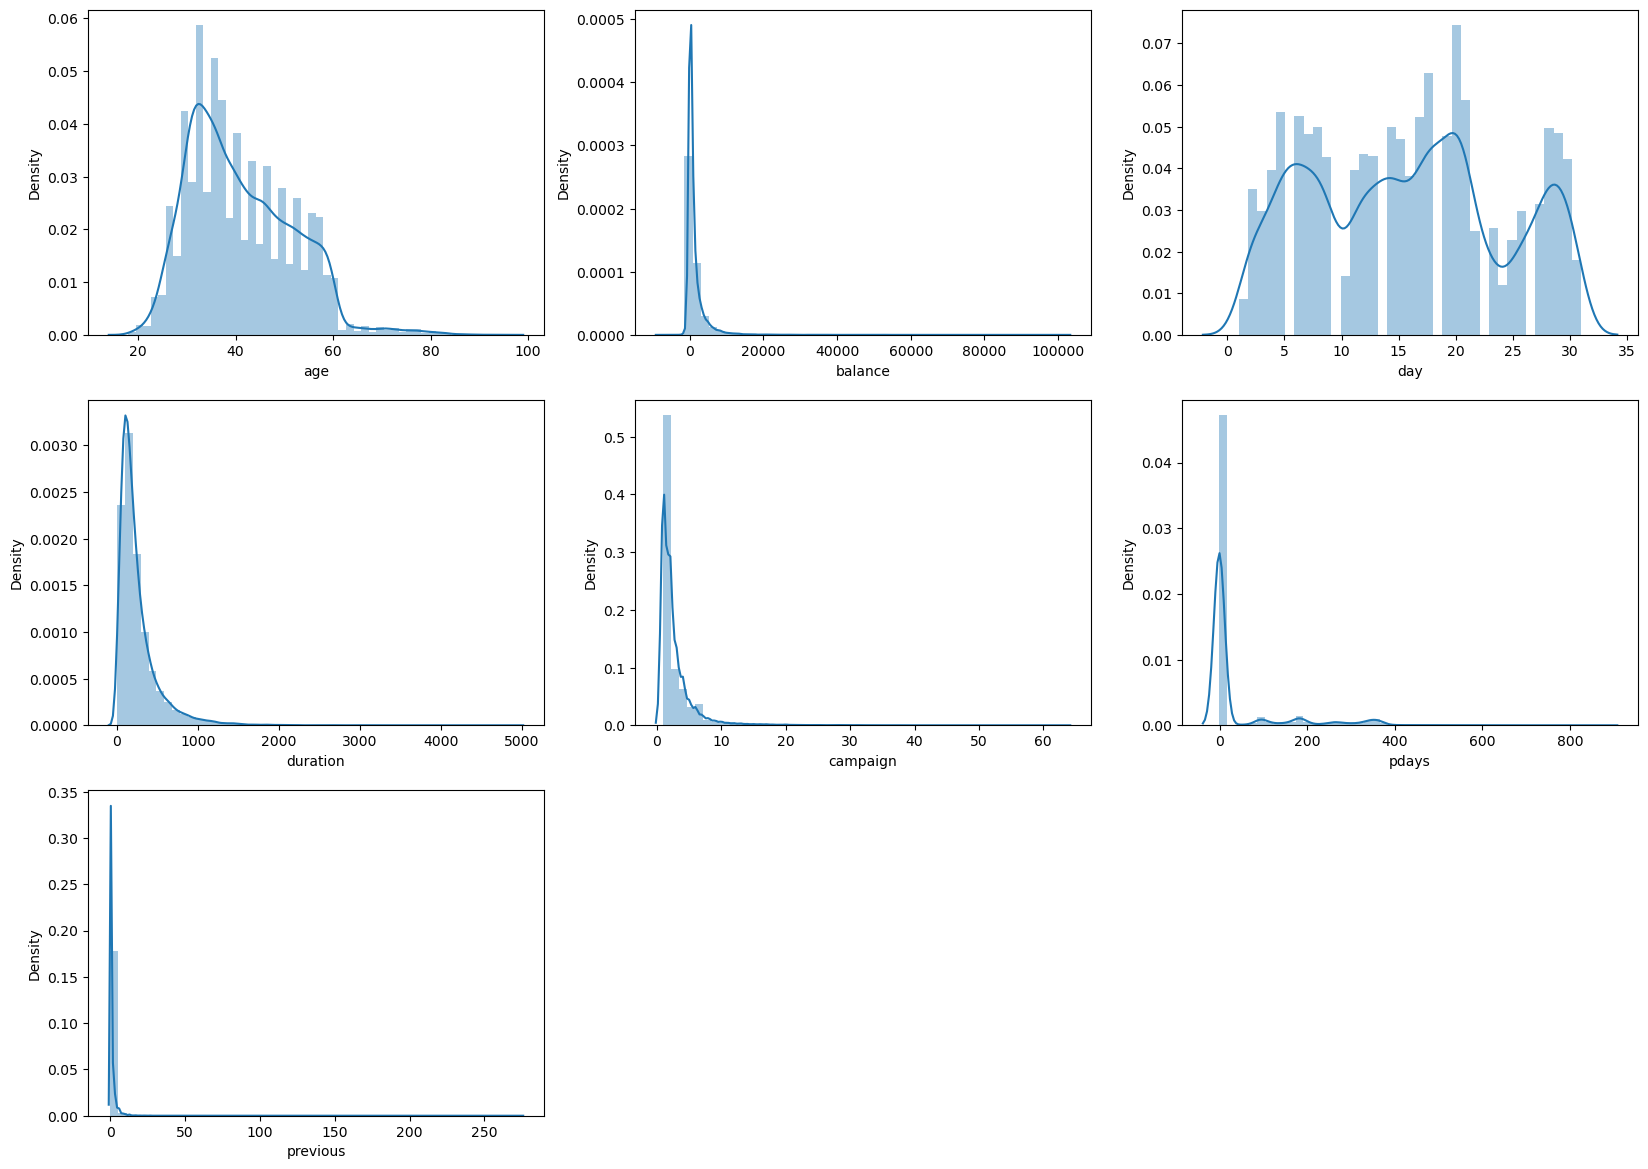

In [18]:
plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber = 1
for nume in num:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(train[nume])
    plt.xlabel(nume)
    plotnumber+=1
plt.show()

Here we observed-:
    
- age and day are close to normal distribution.
- balance,duration,campaign,pdays and previous are right skewed and may have some outliers.

**relation between numerical features and target fatures**

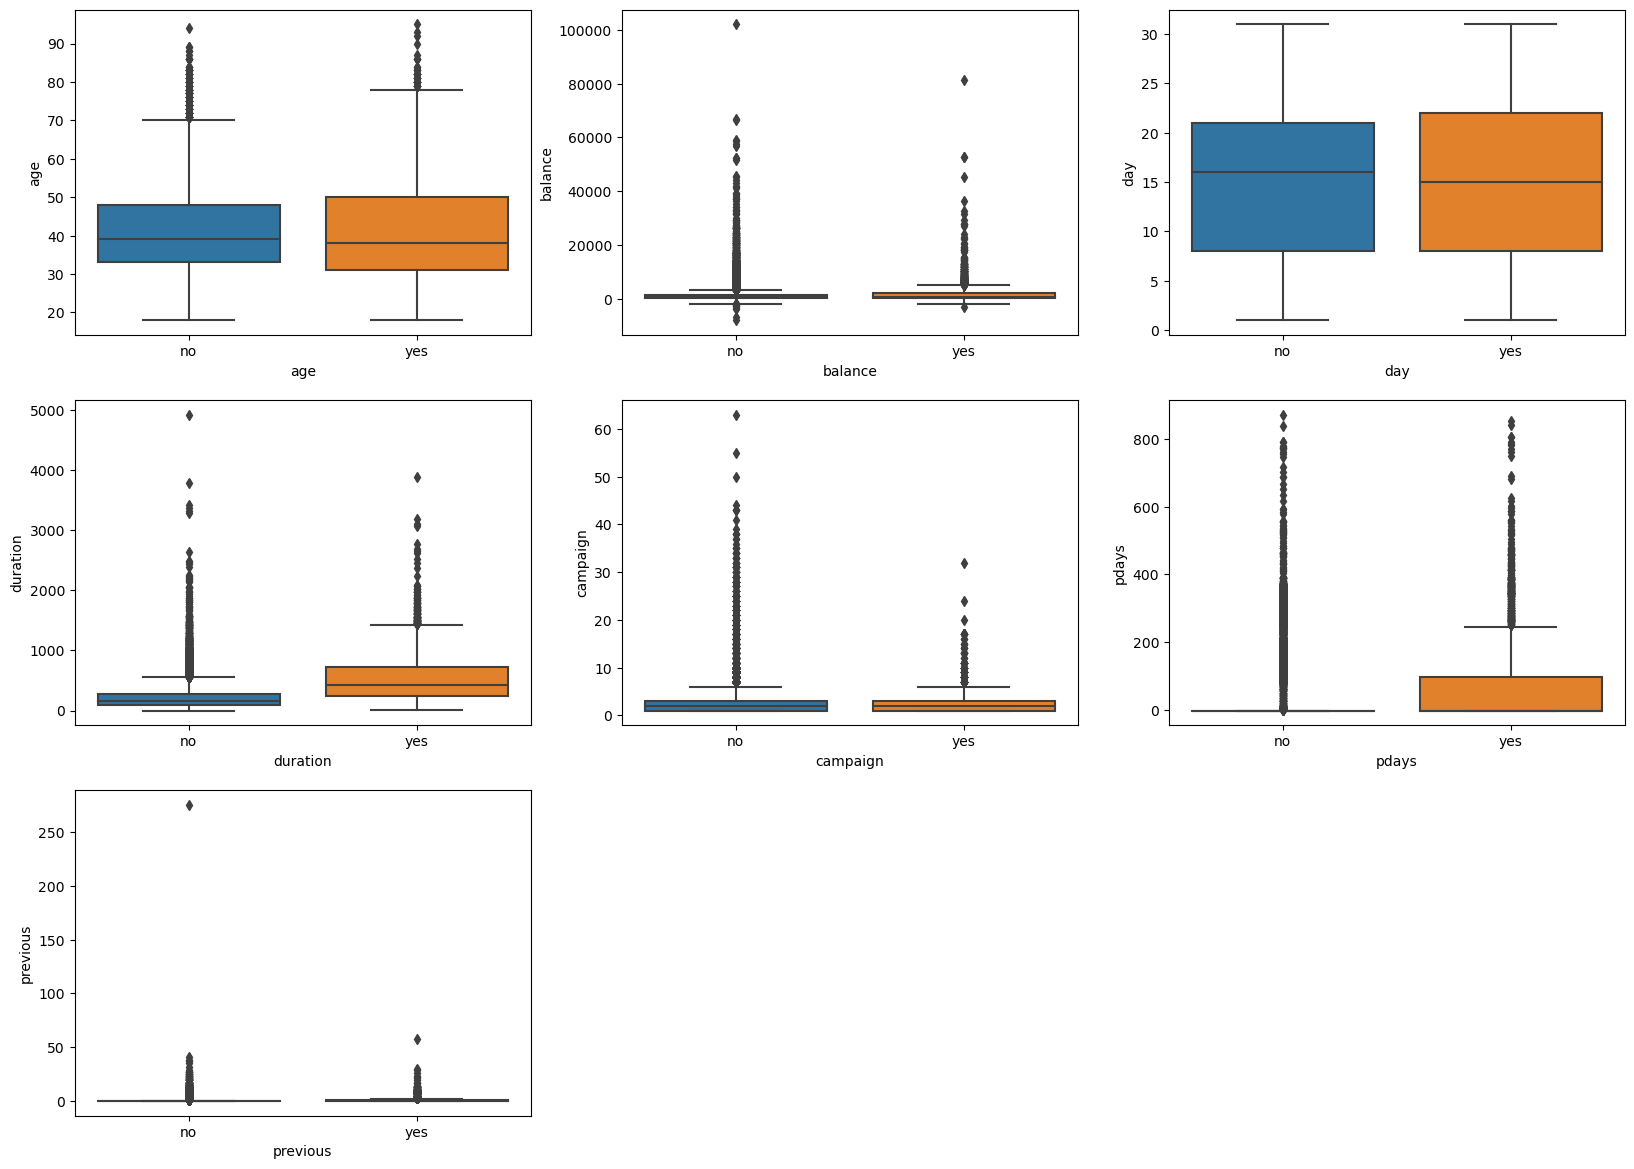

In [19]:
plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber = 1
for nume in num:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='subscribed',y=train[nume], data = train)
    plt.xlabel(nume)
    plotnumber+=1
plt.show()

**Finding outlier in numerical features**

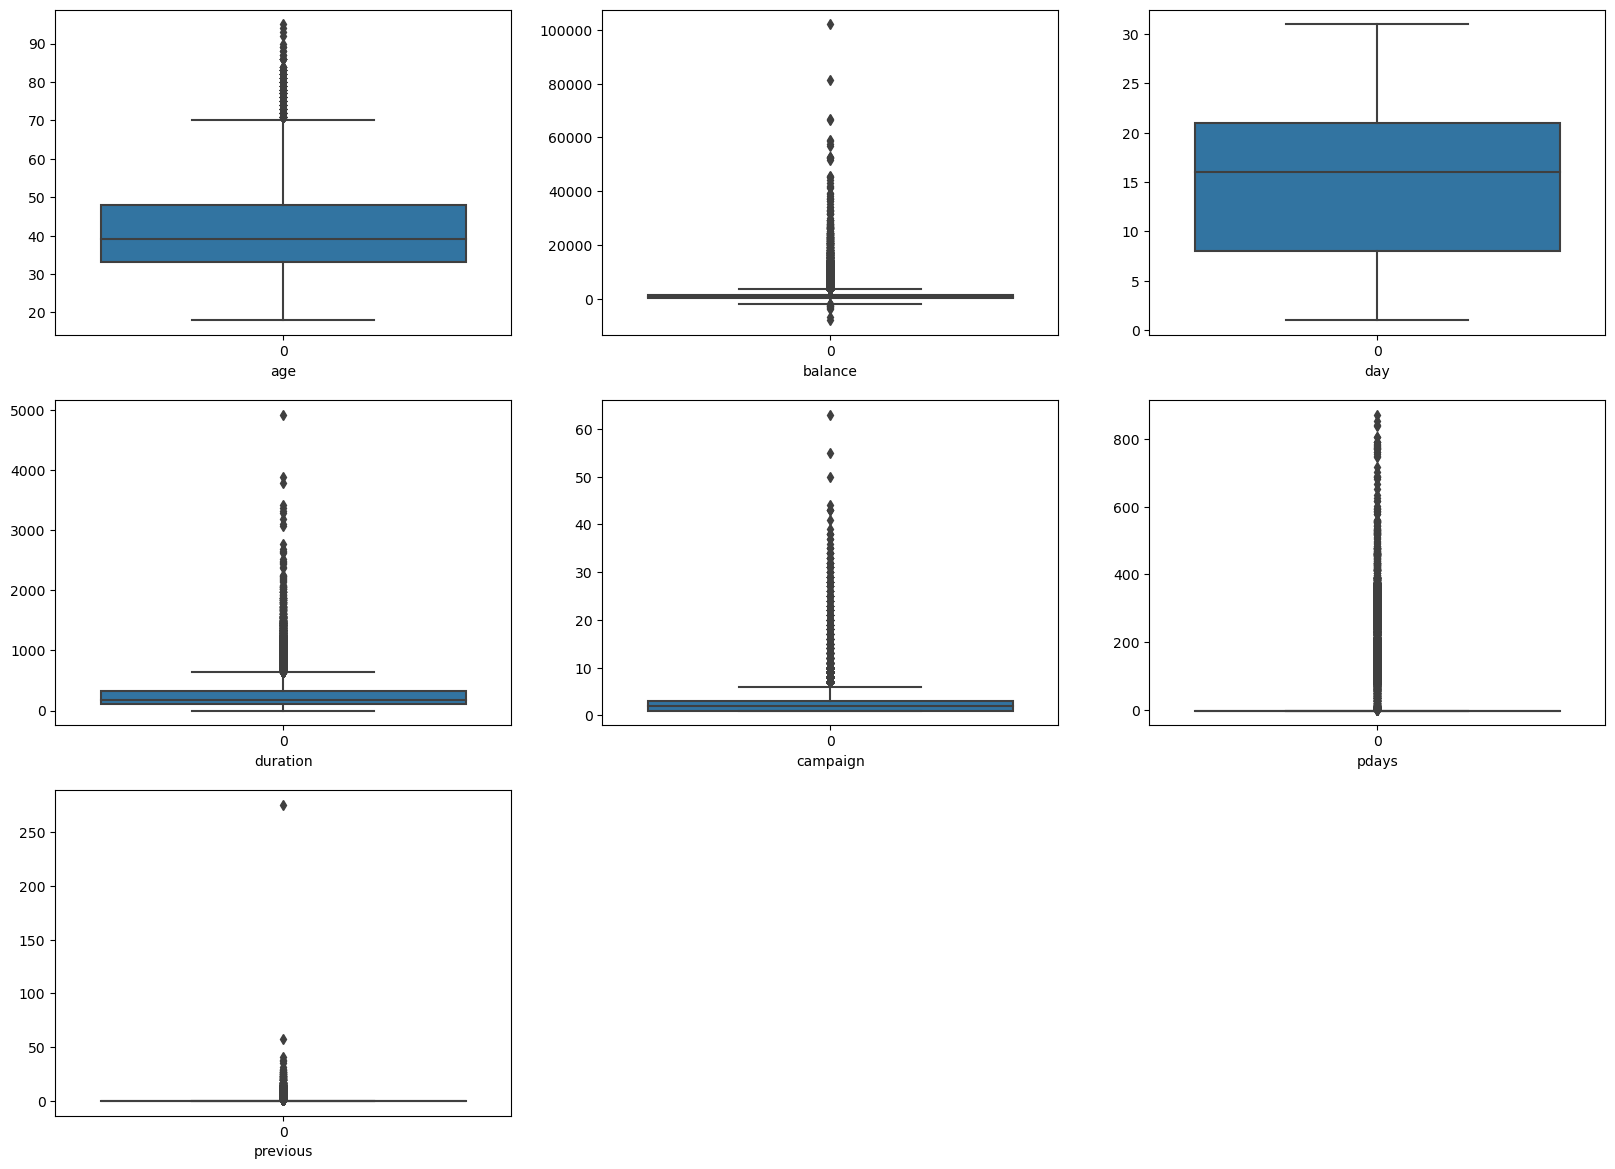

In [20]:
plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber = 1
for nume in num:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(train[nume])
    plt.xlabel(nume)
    plotnumber+=1
plt.show()

We observed following column have outlier-:
- age
- balance
- duration
- campaign
- pdays
- previous

<Axes: >

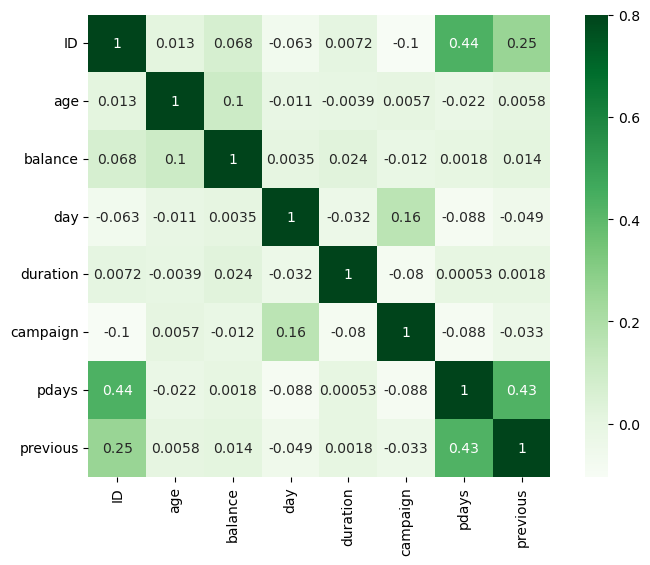

In [21]:
#visualizing the relationship between all numerical features using heatmap
mat = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(mat, vmax=0.8, square=True, cmap = 'Greens', annot = True)

we do not observ correlation between the numerical features.

**Analysis of subscribed value**

In [22]:
#frequency of subscribed
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

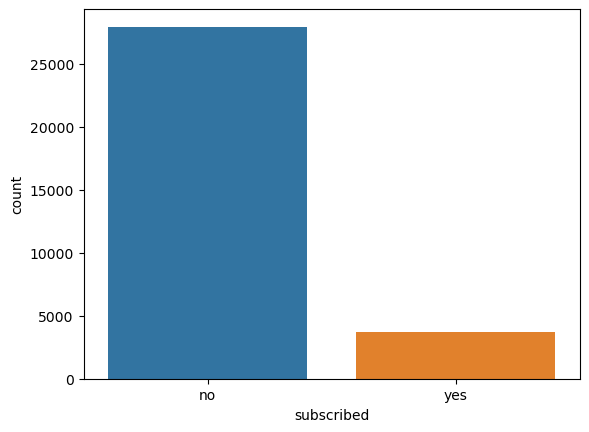

In [23]:
# count plot
sns.countplot(data=train, x='subscribed')

In [24]:
# normalizing the frequency table of 'subscribed' variable
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<Axes: >

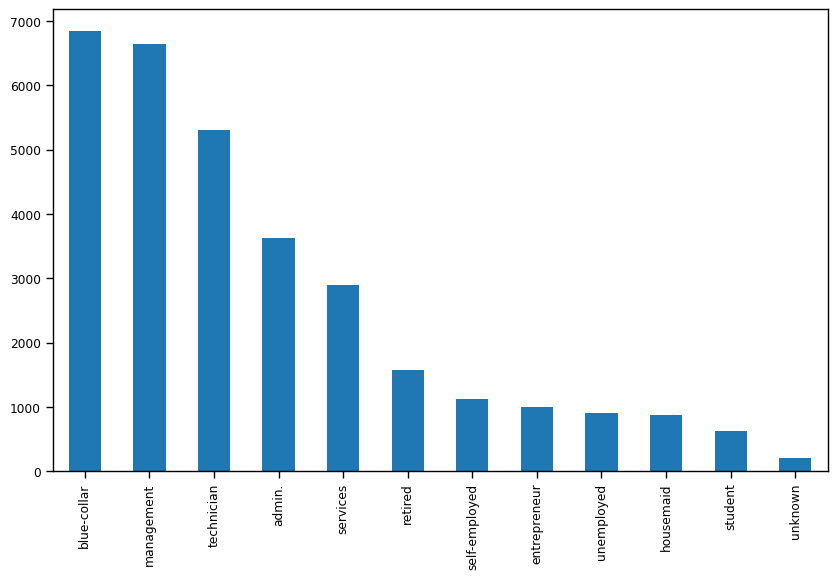

In [25]:
# plotting the job frequency table
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6))

we can see that most of the clients beloned to blue-collar job and student are least in general as they don't make term deposite in general.

**Analysis of marital status**

In [26]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

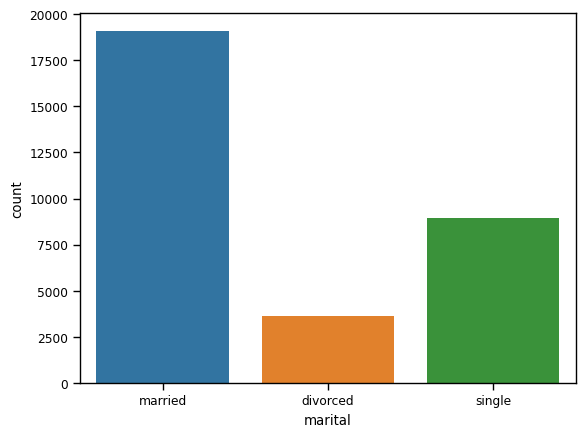

In [27]:
sns.countplot(data=train,x='marital')

<Axes: xlabel='marital', ylabel='count'>

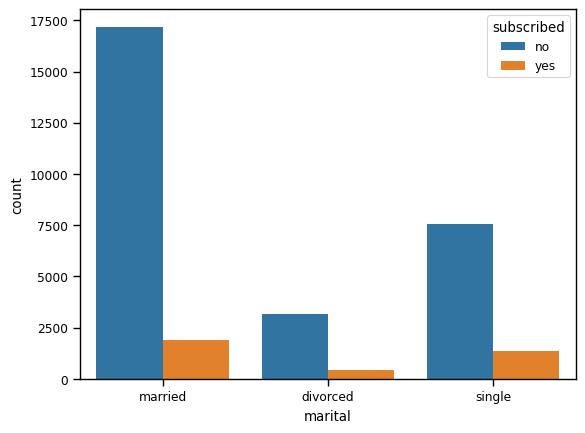

In [28]:
sns.countplot(data=train, x='marital', hue = 'subscribed')

**Analyzing the 'age' variable**

<Axes: xlabel='age', ylabel='Density'>

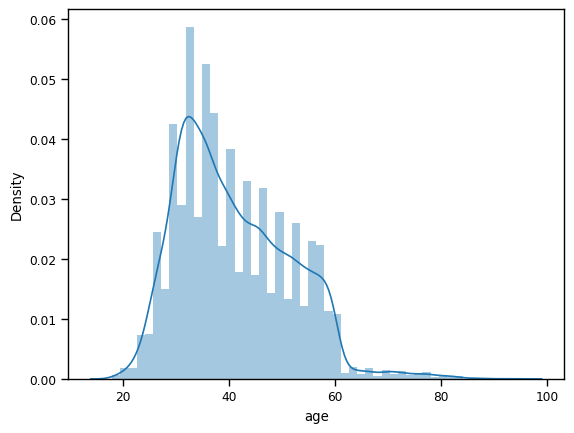

In [29]:
sns.distplot(train['age'])

we can infer that most of the clients fall in age group between 20-60

**Biviriate Analysis**

**job v/s subscribed**

In [30]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [31]:
j = pd.crosstab(train['job'], train['subscribed'])
ja = j.div(j.sum(1).astype(float), axis = 0)

<Axes: xlabel='job'>

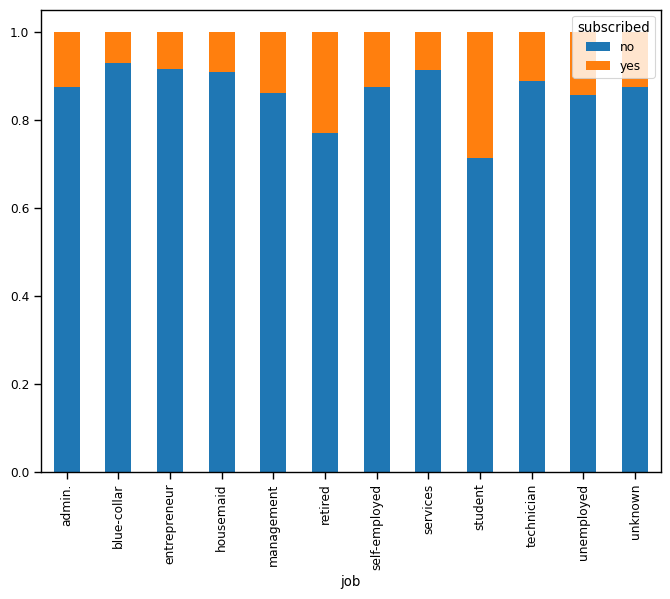

In [32]:
ja.plot.bar(stacked = True, figsize = (8,6))

From the above the graph we can infer that student and retiered people have higher chance of subscriping to a term deposite, which is suprising as student generally do not subscribe to a term deposite. The possible reason is that the number of students in a datasets is less and comparitively to other job types, more students havesubscribed to a term deposite.

In [33]:
#Marital vs subscribed
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [34]:
m = pd.crosstab(train['marital'], train['subscribed'])
ma = m.div(m.sum(1).astype(float), axis = 0)
ma

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


<Axes: xlabel='marital'>

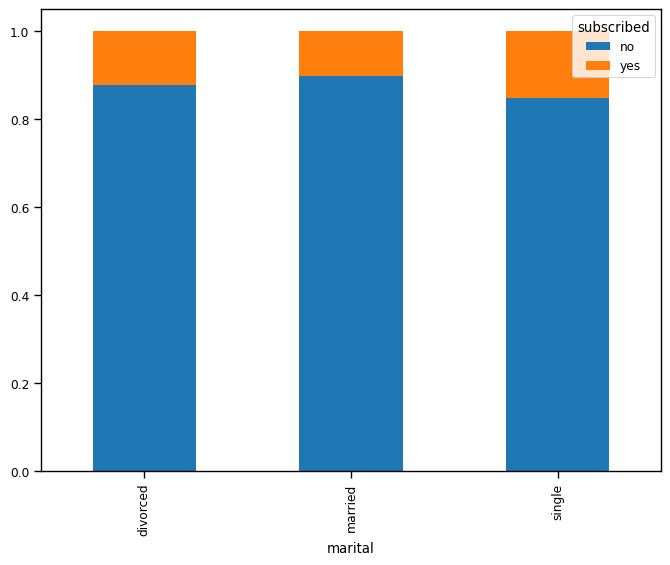

In [35]:
ma.plot.bar(stacked = True, figsize = (8,6))

From the above analysis we can infer that material status doesn't have a major impact on the subscription to term deposits

In [36]:
#default vs subscription
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [37]:
dd = pd.crosstab(train['default'], train['subscribed'])
da = dd.div(dd.sum(1).astype(float), axis = 0)
da


subscribed,no,yes
default,,
no,0.881720,0.118280
yes,0.929915,0.070085


<Axes: xlabel='default'>

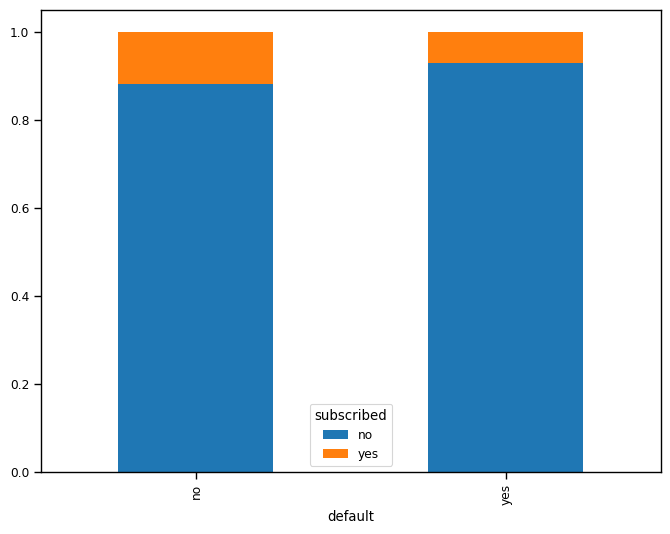

In [38]:
da.plot.bar(stacked = True, figsize = (8,6))

In [39]:
# making a copy of data for doing feature engineering
tc = train.copy()
print(tc.head())

      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

In [40]:
# removing the column id and defaut from tc
tc.drop(['ID', 'default'], axis = 1, inplace = True)
tc.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [41]:
pd.crosstab(tc['subscribed'], tc['pdays'])

pdays,-1,1,2,4,5,6,7,8,9,10,...,782,784,791,792,804,805,838,842,854,871
subscribed,,,,,,,,,,,,,,,,,,,,,
no,23553,6,24,1,7,7,6,16,7,2,...,0,0,1,1,0,0,1,0,0,1
yes,2371,5,1,1,0,0,0,0,1,4,...,1,1,0,1,1,1,0,1,1,0


In [42]:
tc['pdays'].value_counts(normalize=True)

-1      0.819161
 182    0.003729
 92     0.003160
 91     0.002749
 183    0.002686
          ...   
 51     0.000032
 20     0.000032
 25     0.000032
 526    0.000032
 382    0.000032
Name: pdays, Length: 509, dtype: float64

Here we observ the value -1 is fetched in around 82% of total rows of the dataset. Thus, the feature pdays has outlier and feature will be removed.

In [43]:
tc.drop(['pdays'], axis = 1, inplace=True)
tc.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,0,unknown,no


In [44]:
cc = ['job', 'material','education','contact','month','poutcome']
print(cc)
for catt in cc:
    if catt in tc.columns:
        tc = pd.concat([tc.drop(catt, axis = 1),
                       pd.get_dummies(tc[catt], prefix=catt, prefix_sep='_', drop_first=True, dummy_na=False)],
                      axis=1)

['job', 'material', 'education', 'contact', 'month', 'poutcome']


In [45]:
bb = ['housing','loan','subscribed']
print(bb)

for b in bb:
    tc[b+'_new']=tc[b].apply(lambda x:1 if  x=='yes' else 0)
    tc.drop(b,axis = 1, inplace=True)

['housing', 'loan', 'subscribed']


In [46]:
tc.head()

,age,marital,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,subscribed_new
0,56,married,1933,19,44,2,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,31,married,3,20,91,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,27,married,891,18,240,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,57,divorced,3287,22,867,1,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,31,married,119,4,380,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [47]:
# coverting the marital into 0s,1s and 2s
tc['marital'].replace('married',0,inplace=True)
tc['marital'].replace('divorced',1,inplace=True)
tc['marital'].replace('single',2,inplace=True)

**Splitting the dataset into training set and test set**

In [48]:
#independence features
x = tc.drop(['subscribed_new'], axis = 1)
#target_features
y = tc['subscribed_new']

# Machine Learning and Model building

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state=0)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (25317, 39)
Training target vector : (25317,)
Test feature matrix size : (6330, 39)
Test target vector size : (6330,)


**Find best random rate**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2, random_state=0)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.8867298578199052 on Random_state 1


# Logistic Regression

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=69)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.891051567239636
Confusion Matrix Of Logistic Regression :  [[6857  136]
 [ 726  193]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.90      0.98      0.94      6993
           1       0.59      0.21      0.31       919

    accuracy                           0.89      7912
   macro avg       0.75      0.60      0.63      7912
weighted avg       0.87      0.89      0.87      7912



In [53]:
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.89210111 0.89146919 0.88734397 0.89129404 0.89003002]
Mean CVS Score :  0.8904476672365252
Std Deviation :  0.001691217367701628


# Decision Tree Classifier

In [54]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Decision Tree Classifier Evaluation")
print('\n')
print("Accuracy Score Of Decision Tree Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Decision Tree Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Decision Tree Classifier : ", classification_report(y_test,y_pred))

Decision Tree Classifier Evaluation


Accuracy Score Of Decision Tree Classifier :  0.868933265925177
Confusion Matrix Of Decision Tree Classifier :  [[6434  559]
 [ 478  441]]
Classification Report Of Decision Tree Classifier :                precision    recall  f1-score   support

           0       0.93      0.92      0.93      6993
           1       0.44      0.48      0.46       919

    accuracy                           0.87      7912
   macro avg       0.69      0.70      0.69      7912
weighted avg       0.87      0.87      0.87      7912



In [55]:
cv_score = cross_val_score(dt, x,y,cv=5)
print("Cross Validation Score",dt)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score DecisionTreeClassifier()
CVS Score :  [0.87030016 0.87551343 0.86806763 0.87707379 0.87486175]
Mean CVS Score :  0.8731633492309655
Std Deviation :  0.0034018589327566386


# Random Forest Classifier

In [56]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Random Forest Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Random Forest Classifier : ", classification_report(y_test,y_pred))

Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.9035642062689585
Confusion Matrix Of Random Forest Classifier :  [[6800  193]
 [ 570  349]]
Classification Report Of Random Forest Classifier :                precision    recall  f1-score   support

           0       0.92      0.97      0.95      6993
           1       0.64      0.38      0.48       919

    accuracy                           0.90      7912
   macro avg       0.78      0.68      0.71      7912
weighted avg       0.89      0.90      0.89      7912



In [57]:
cv_score = cross_val_score(rf, x,y,cv=5)
print("Cross Validation Score",rf)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score RandomForestClassifier()
CVS Score :  [0.90821485 0.90616114 0.90188023 0.90346026 0.90077421]
Mean CVS Score :  0.90409813948531
Std Deviation :  0.0027414499517517746


# XGB Classfier

In [58]:
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
print("XGB Classifier Evaluation")
print('\n')
print("Accuracy Score Of XGB Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of XGB Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of XGB Classifier : ", classification_report(y_test,y_pred))

XGB Classifier Evaluation


Accuracy Score Of XGB Classifier :  0.9067239635995955
Confusion Matrix Of XGB Classifier :  [[6724  269]
 [ 469  450]]
Classification Report Of XGB Classifier :                precision    recall  f1-score   support

           0       0.93      0.96      0.95      6993
           1       0.63      0.49      0.55       919

    accuracy                           0.91      7912
   macro avg       0.78      0.73      0.75      7912
weighted avg       0.90      0.91      0.90      7912



# Hyper Parameter Tunning: GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param = [{'n_estimators':[10,50,100,130],
         'criterion':['gini','entropy'],
         'max_depth':range(2,4,1),
         'max_features':['auto','log2']
         }]


In [61]:
gc = GridSearchCV(RandomForestClassifier(),param,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 4),
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [10, 50, 100, 130]}],
             verbose=5)

In [62]:
gc.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 10}

# Final Model

In [63]:
final = RandomForestClassifier(criterion= 'gini', max_depth = 3, max_features = 'log2', n_estimators = 10)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Random Forest Classifier : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Random Forest Classifier : ", classification_report(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  0.8849848331648129
Confusion Matrix Of Random Forest Classifier :  [[6993    0]
 [ 910    9]]
Classification Report Of Random Forest Classifier :                precision    recall  f1-score   support

           0       0.88      1.00      0.94      6993
           1       1.00      0.01      0.02       919

    accuracy                           0.88      7912
   macro avg       0.94      0.50      0.48      7912
weighted avg       0.90      0.88      0.83      7912



# Confusion Matrix

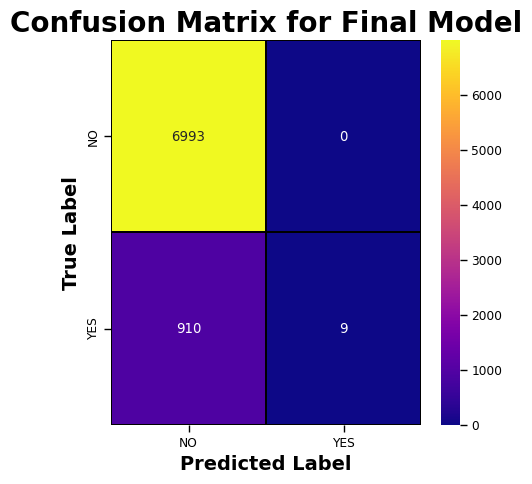

In [64]:
Matrix = confusion_matrix(y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

# Predicting the final model

In [65]:
# Prediction
prediction = final.predict(x_test)

In [66]:
Actual = np.array(y_test)
data_pred = pd.DataFrame()
data_pred["Predicted Values"] = prediction
data_pred["Actual Values"] = Actual
data_pred.head()

,Predicted Values,Actual Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**Applying model on test set**

In [67]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [68]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [69]:
test.shape

(13564, 17)

In [70]:
#removing the fields: id, defaults, pdays
test.drop(['ID','default','pdays'], axis = 1,inplace=True)

In [71]:
test.shape

(13564, 14)

In [72]:
cc = ['job','material','education','contact','month','poutcome']
cc

['job', 'material', 'education', 'contact', 'month', 'poutcome']

In [73]:
for catt in cc:
    if catt in test.columns:
        test = pd.concat([test.drop(catt, axis = 1),
                       pd.get_dummies(test[catt], prefix=catt, prefix_sep='_', drop_first=True, dummy_na=False)],
                      axis=1)

In [74]:
test.head()

,age,marital,balance,housing,loan,day,duration,campaign,previous,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,married,118,yes,no,15,20,6,0,0,...,0,0,0,1,0,0,0,0,0,1
1,78,divorced,2787,no,no,1,372,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,31,single,144,yes,no,16,676,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,57,single,3777,yes,no,13,65,2,0,0,...,0,0,0,1,0,0,0,0,0,1
4,45,divorced,-705,no,yes,3,111,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [75]:
bb = ['housing','loan']
print(bb)

for b in bb:
    test[b+'_new']=test[b].apply(lambda x:1 if  x=='yes' else 0)
    test.drop(b,axis = 1, inplace=True)

['housing', 'loan']


In [76]:
test.head()

,age,marital,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,32,married,118,15,20,6,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,78,divorced,2787,1,372,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,single,144,16,676,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,57,single,3777,13,65,2,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,45,divorced,-705,3,111,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [77]:
# coverting the marital into 0s,1s and 2s
test['marital'].replace('married',0,inplace=True)
test['marital'].replace('divorced',1,inplace=True)
test['marital'].replace('single',2,inplace=True)

**Predicting the final model**

In [78]:
# Prediction
prediction = xg.predict(test)

In [79]:
print(prediction)

[0 1 0 ... 0 1 0]


# Saving the model

In [80]:
import joblib
joblib.dump(final,"bank_marketing")

['bank_marketing']